# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'X': age, 'Y': tardies})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

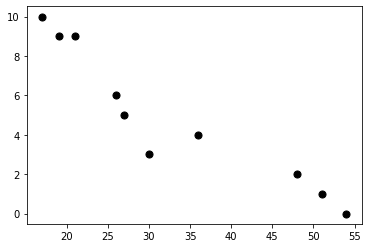

In [3]:
plt.figure()
plt.scatter(student_data['X'], student_data['Y'], color= 'k', s=50)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
print('I see a negative trend. It seems that the initial hypothesis by the collector of the data is right. \nYounger students arrive late to class more often')

I see a negative trend. It seems that the initial hypothesis by the collector of the data is right. 
Younger students arrive late to class more often


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# correlation
correlation = student_data.corr()

# covariance
covariance = student_data.cov()

print(correlation)
print(covariance)

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


### Covariance
*from [wikipedia](https://en.wikipedia.org/wiki/Covariance)

In probability theory and statistics, covariance is a measure of the joint variability of two random variables. 
- If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. 
- In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. 
**The sign of the covariance therefore shows the tendency in the linear relationship between the variables.** 


### Correlation 

The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. 
**The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.**

### In summary

1. **“Covariance” indicates the direction of the linear relationship between variables.** 
2. **“Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.** 
3. **Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas, covariance values are not.**
4. **You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.**

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# making a correlation
# define x and y
x = student_data['X']
y = student_data['Y']

# apply linear model
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


Plot your regression model on your scatter plot.

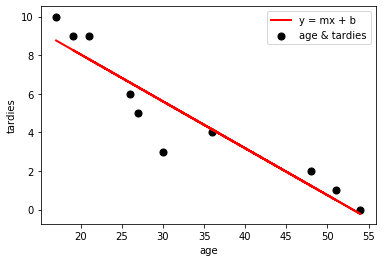

In [7]:
# Your code here.
plt.figure()
plt.scatter(student_data['X'], student_data['Y'], color= 'k', s=50, label='age & tardies')
plt.plot(x, slope*x + intercept, color= 'r', lw=2, label='y = mx + b')
plt.xlabel('age')
plt.ylabel('tardies')
plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
print('p-value is: ' + str(p_value))
print('r-squared is: ' + str(r_value*r_value))

p-value is: 5.56665383455343e-05
r-squared is: 0.8820265558250108


### Conclusions
The p-value results from a two-sided hypothesis test whose null hypothesis **is that the slope is zero**, using Wald Test with t-distribution of the test statistic [(from the documentation)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html). 

- Because the value is very very low, we can **reject this hypothesis and state that the slope of this curve is significantly different from ZERO, so there is a relationship between the two variables.**

In statistics, the coefficient of determination **(r-squared)**, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

- Our r-squared is relatively **high 0.88 which says that 88% of the variance in tardiness can be explained by age.**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
vehicles = pd.read_csv('C:/Users/Zaca/Documents/Datasets/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

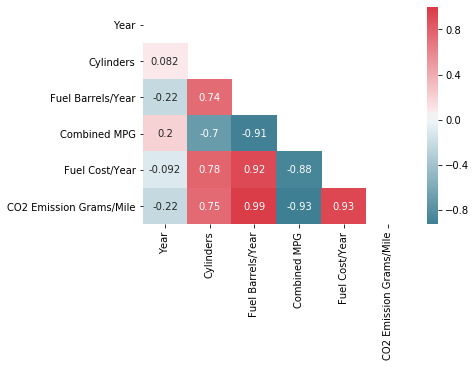

In [10]:
# make the correlation matrix
correlation = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

# making a mask to only show half the table cause its duplicated.
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, cmap=cmap, mask=mask, annot= True)

**- The variables most correlated with CO2 Emissions are Fuel related (Fuel Barrels/Year and Fuel Cost/Year, and Combined MPG - which I'm assuming means Miles Per Gallon) which makes sense and also Cylinders (slightly less).**


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# variable to predict
Y = vehicles['CO2 Emission Grams/Mile']

# i'm using a linear regression because I don't know which else to use
# also it makes sense to start by that one
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

lm = LinearRegression()
model = lm.fit(X,Y)

print('Score (r-squared): ', lm.score(X,Y))

Score (r-squared):  0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Year,-0.320617
Cylinders,1.878800
Fuel Barrels/Year,19.052925
Combined MPG,-3.040399
Fuel Cost/Year,0.032309


### Conclusions
1. This means that for a unit increase in 'Fuel Barrels/Year', there is an increase of 19.05 units in CO2 emissions. 
2. Similarly, a unit increase in 'Cylinders' results in an increase of 1.87 units in CO2 emissions. 
3. On the other hand, a unit increase in MPG results in a 3.04 units decrease in CO2 emissions.
4. We can see that the rest of the features have very little effect on CO2 emissions.
5. Confidence in these conclusions is high because the model score was 0.98!

**interesting notes:** *Fuel Cost/Year showed up as a pretty highly correlated feature in the matrix before the model, however when calculating the coefficients in the model it pretty much dissapeared. This could be a result of Cost and Barrels per Year are very highly correlated with each other. It makes some sense at least that there is correlation with fuel cost, but it should matter a lot less because fuel cost can be different across countries for instance, and Barrels is a more true measure of gas put in the car*

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

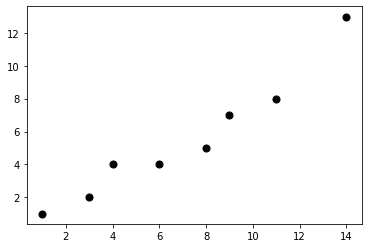

In [14]:
plt.scatter(X, Y, color='k', s=50)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

Score (r-squared):  0.9316696375519905
Slope:  [0.84848485]


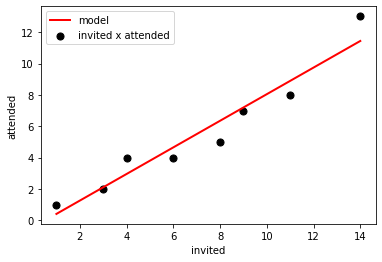

In [15]:
# It is likely that there is a linear relationship between these variables.
# apply linear model
# apparently we need to reshape if we are only using 1 feature.
X = np.array(X).reshape(-1, 1)
lm = LinearRegression()
model = lm.fit(X,Y)

print('Score (r-squared): ', lm.score(X,Y))
print('Slope: ', lm.coef_)

plt.scatter(X, Y, color='k', s=50, label='invited x attended')
plt.plot(X, X*lm.coef_ + lm.intercept_, c='r', lw= 2, label= 'model')
plt.xlabel('invited')
plt.ylabel('attended')
plt.legend()


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Score (r-squared):  0.9433811802232853
Slope:  [0.68421053]


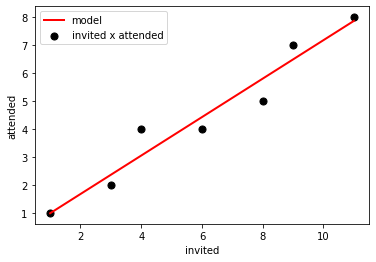

In [16]:
# Errrmmm, yes perhaps the last point. But what I really find problematic is "removing problematic points" :D

X = np.array(X[:-1]).reshape(-1, 1)
Y= Y[:-1]
lm = LinearRegression()
model = lm.fit(X,Y)

print('Score (r-squared): ', lm.score(X,Y))
print('Slope: ', lm.coef_)

plt.scatter(X, Y, color='k', s=50, label='invited x attended')
plt.plot(X, X*lm.coef_ + lm.intercept_, c='r', lw= 2, label= 'model')
plt.xlabel('invited')
plt.ylabel('attended')
plt.legend()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

### Conclusions:

- **According to the first model one might say that the data collector is being paranoid. The slope of the model is pretty close to 1 (well kind of at 0.84) which means that almost everyone he invites to the party actually come.**
- **However, after removing the outlier (the SUPER PARTY!) we can see that for every person invited only 0.68 people show up (amputees maybe?). This confirms his suspicions that the more people are invited, more people say no** 